**Avocado Project**

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
import pandas as pd

# URL of the CSV file
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv"

# Read the CSV file directly into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  


In [2]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Plotting distributions: 100%|███████████████████| 10/10 [00:00<00:00, 13.74it/s]


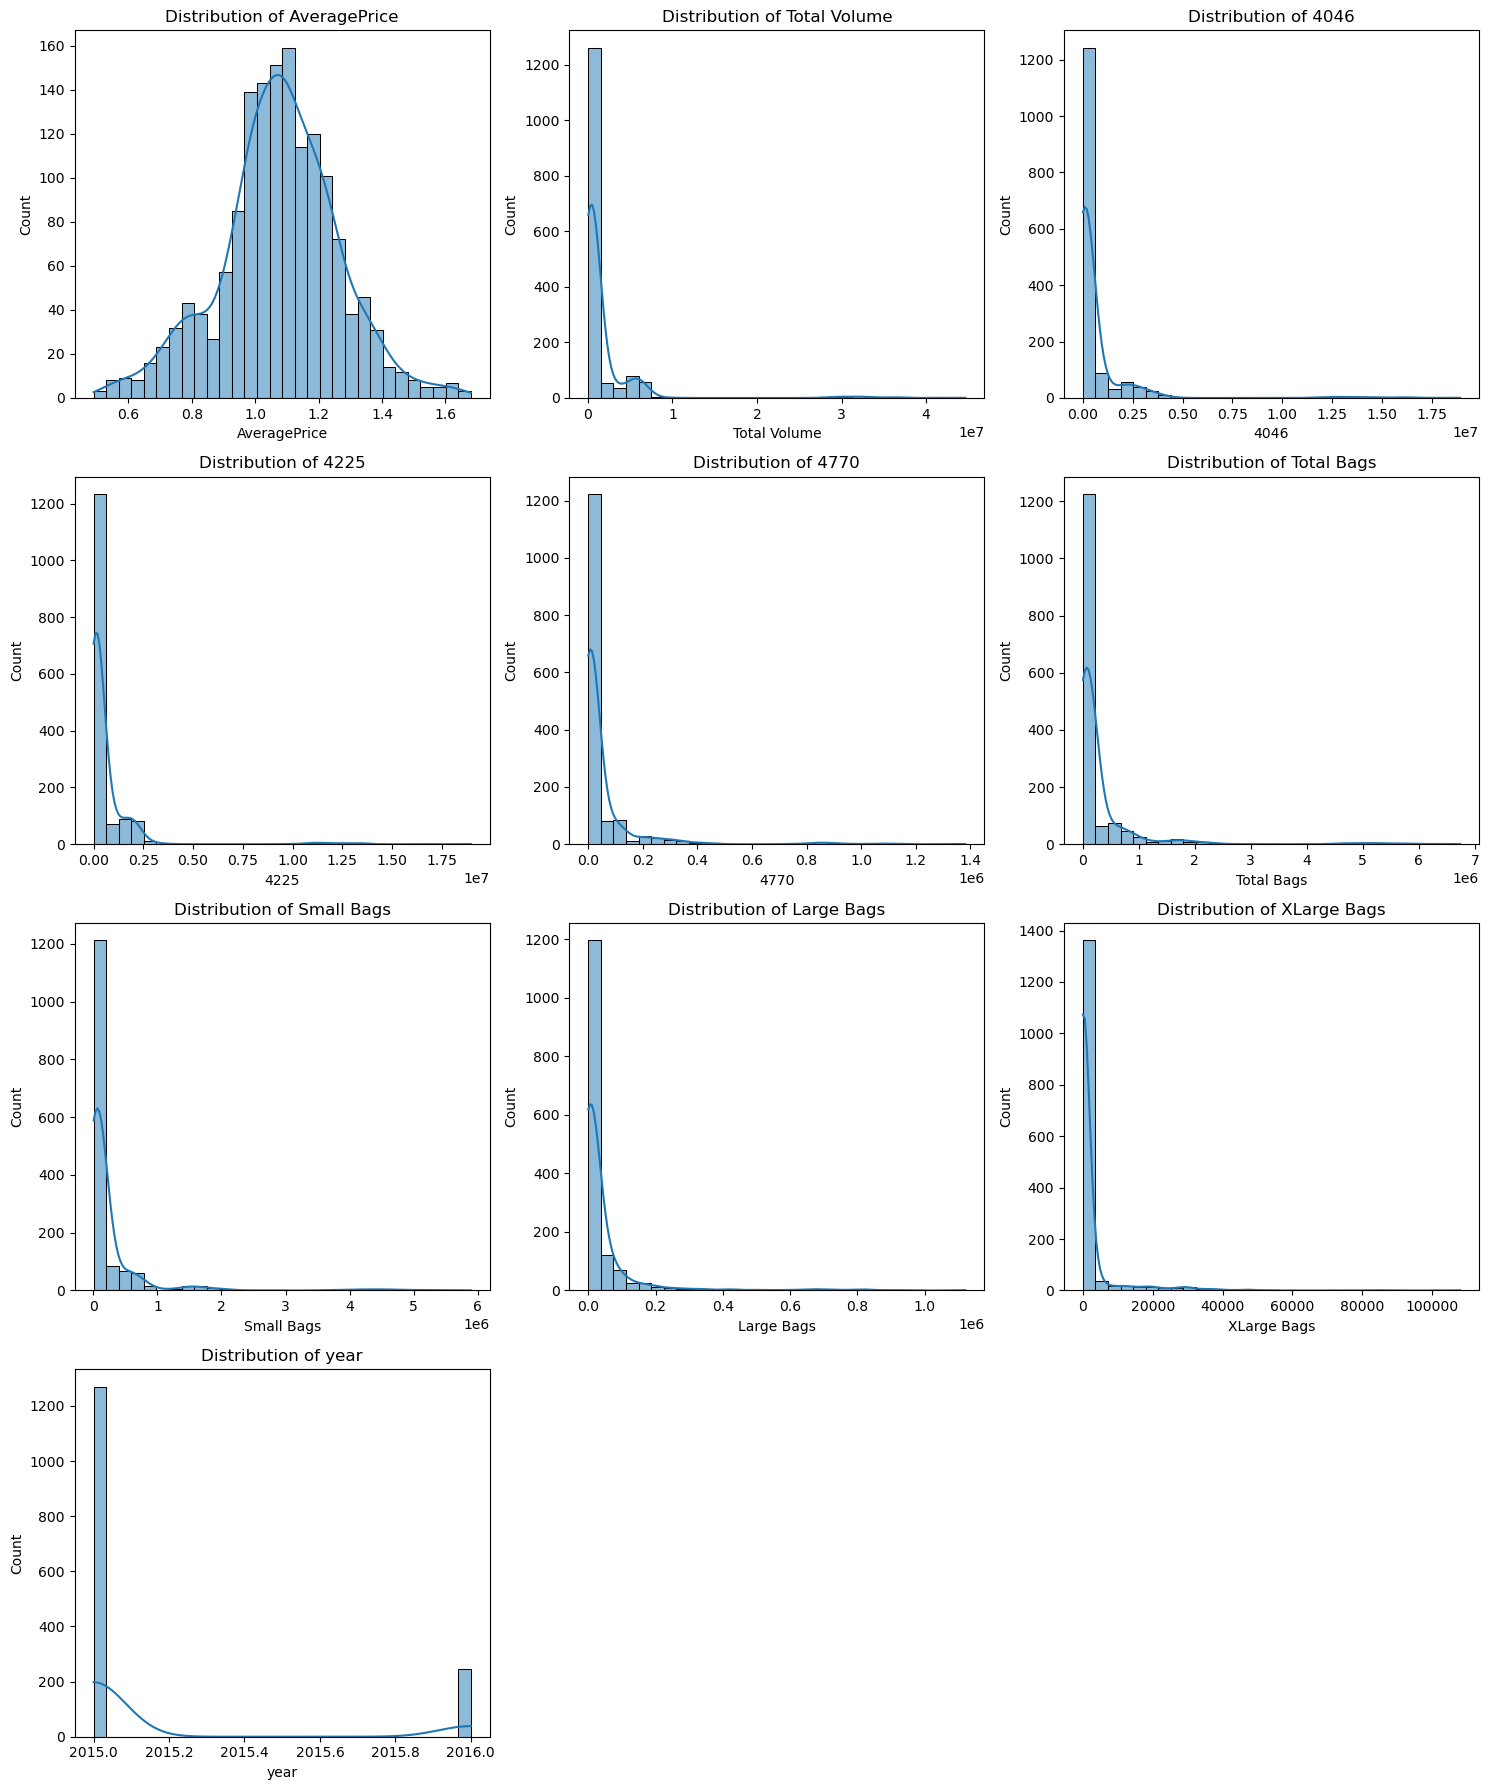

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Import tqdm module for progress bars

# Assuming 'df' is your DataFrame containing the data
plt.figure(figsize=(15, 18))

# List of all numerical columns to plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'Unnamed: 0' if present in the list of columns
if 'Unnamed: 0' in numerical_columns:
    numerical_columns.remove('Unnamed: 0')

# Calculate the number of rows needed for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

# Plotting each numerical feature
for i, column in enumerate(tqdm(numerical_columns, desc='Plotting distributions')):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title('Distribution of ' + column)

plt.tight_layout()
plt.show()


**Observations:-**

1)most of the plots seems left skewed except averageprice which seems to be normally distributed.

2)there are prevelant outliers in the plot

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame loaded with your dataset
# Checking for missing values in each column
missing_values = df.isna().sum()

# Displaying the count of missing values in each column
print(missing_values)


Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


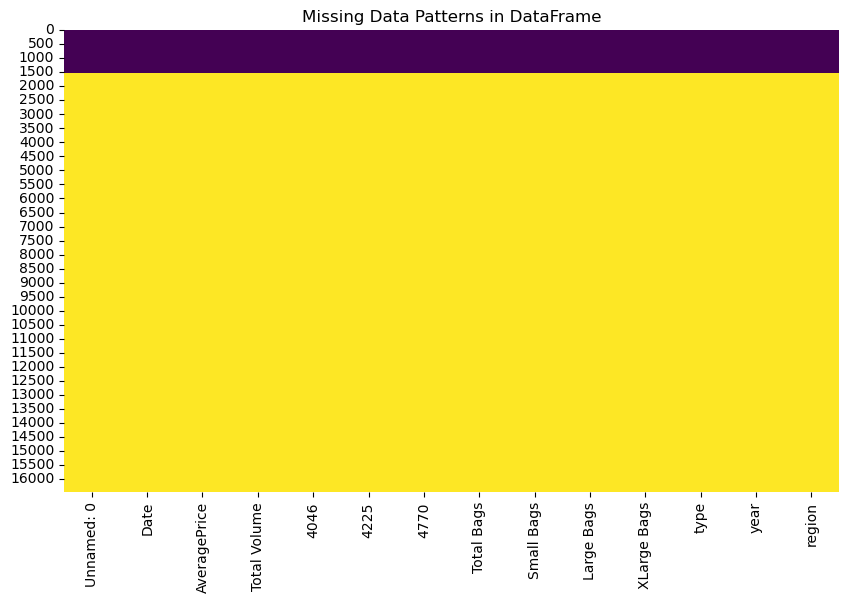

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


missing_data = df.isnull()

# Plotting a heatmap to visualize missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Patterns in DataFrame')
plt.show()


**DELETING THE MISSING VALUES**

In [43]:
# Remove rows with any missing values
print("Shape of original dataframe:", df.shape)

df = df.dropna()

# To remove missing values from specific columns, you can specify them
# For example:
# df_cleaned = df.dropna(subset=['Column_A', 'Column_B'])

# Check the shape of the cleaned dataframe
print("Shape of dataframe after removing missing values:", df.shape)


Shape of original dataframe: (16468, 14)
Shape of dataframe after removing missing values: (1517, 14)


In [44]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Split the "Date" column into day, month, and year columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop("Date",axis=1,inplace=True)

**Extracting day,month and year from date feature**

In [45]:
# Drop columns 'Unnamed: 0' and 'type' if they exist
columns_to_drop = ['Unnamed: 0', 'type',]
if all(col in df.columns for col in columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)
    print("Columns dropped successfully.")
else:
    print("One or more columns not found in the DataFrame.")

Columns dropped successfully.


In [46]:
from scipy import stats
import numpy as np
# Calculate the Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for the Z-score to identify outliers
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Count the number of outliers
num_outliers = sum(outlier_mask)

# Remove the outliers from the dataframe
cleaned_df = df[~outlier_mask]

# Save the cleaned dataframe to a CSV file
cleaned_filename = 'cleaned_avocado_data.csv'
cleaned_df.to_csv(cleaned_filename, index=False)

num_outliers, cleaned_filename

(81, 'cleaned_avocado_data.csv')

removing outliers from the dataset

In [47]:
df_classification=df.copy() # making copy of a dataframe so that we solve second part of the project which is a classification task

In [57]:
df=cleaned_df.copy() #making copy of a dataframe for first part of project

At This stage we are using target encoding to encode region feature which replaces labels by the mean of some other feature by replacing label with grouping and mean

In [58]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Calculate the mean of 'AveragePrice' for each region
region_means = df.groupby('region')['AveragePrice'].mean()

# Map the means back to the 'region' column
df['region_encoded'] = df['region'].map(region_means)

# Display the updated DataFrame
print(df[['region', 'region_encoded']])


         region  region_encoded
0        Albany        1.238657
1        Albany        1.238657
2        Albany        1.238657
3        Albany        1.238657
4        Albany        1.238657
...         ...             ...
1512  Charlotte        1.311613
1513  Charlotte        1.311613
1514  Charlotte        1.311613
1515  Charlotte        1.311613
1516  Charlotte        1.311613

[1436 rows x 2 columns]


In [59]:
df.drop("region",axis=1,inplace=True) # dropping region column

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming your dataset is stored in a DataFrame called 'df'

# Define features (X) and target variable (y)
X = df.drop(['AveragePrice'], axis=1)  # Features except 'AveragePrice' and 'region'
y = df['AveragePrice']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and MSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error (MSE): {mse}')


R-squared: 0.7221579279696235
Mean Squared Error (MSE): 0.009799287287333858


MSE is very small and model is covering upto 72% of the data which is a good indicator

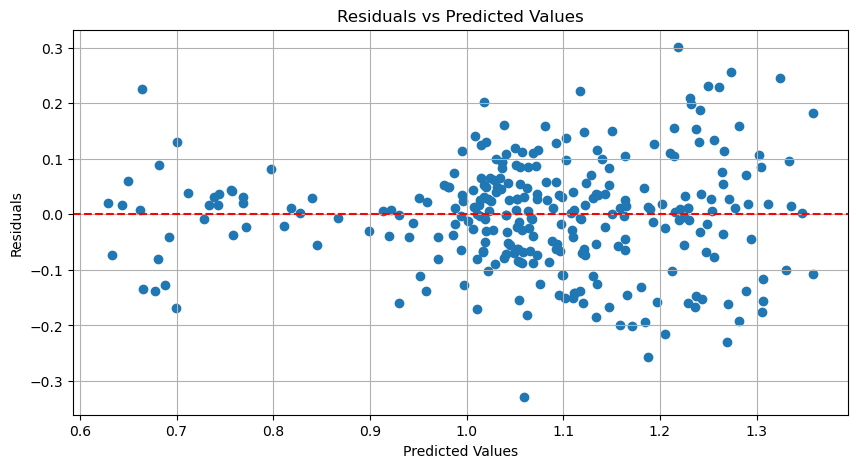

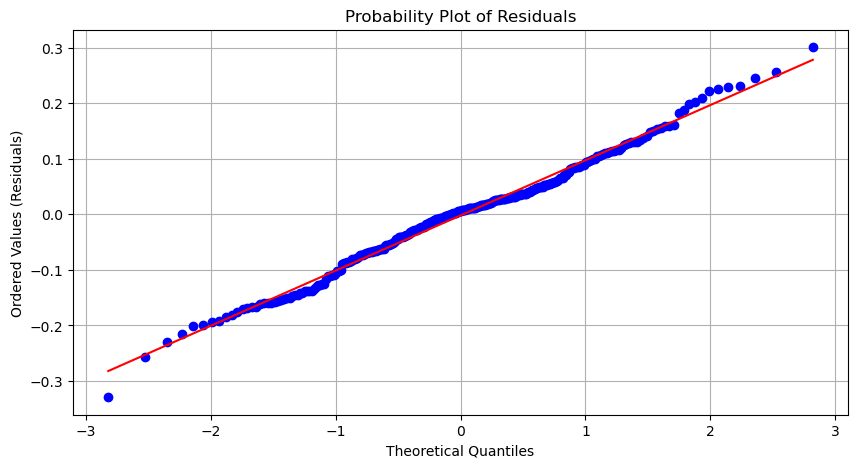

In [61]:
# Plot residuals vs predicted values
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Create a probability plot for residuals
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Residuals)')
plt.grid(True)
plt.show()

From the plot model is generalising the data well and not overfitting

**2) second part of the project is to predict the refion column.The preprocessing is already done in previous question now only encoding of region is left.**

In [63]:
df_classification.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,29,11,2015


We have to encode region columns we will be using one hot encoding for this task

In [71]:
df_classification["region"] 

0          Albany
1          Albany
2          Albany
3          Albany
4          Albany
          ...    
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, Length: 1517, dtype: object

In [89]:
# One-hot encode the 'region' column
encoded_df = pd.get_dummies(df_classification, columns=['region'])

# Display the head of the new dataframe with encoded columns
print(encoded_df.head())

   AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags    year  ...  region_SouthCarolina  \
0     8603.62       93.25          0.0  2015.0  ...                     0   
1     9408.07       97.49          0.0  2015.0  ...                     0   
2     8042.21      103.14          0.0  2015.0  ...                     0   
3     5677.40      133.76          0.0  2015.0  ...                     0   
4     5986.26      197.69          0.0  2015.0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the feature columns: all columns except 'region' and the target columns
X_columns = [col for col in encoded_df.columns if col.startswith('region_') is False]
X = encoded_df[X_columns]

# Define the target columns: all columns that start with 'region_'
y_columns = [col for col in encoded_df.columns if col.startswith('region_')]
y = encoded_df[y_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# First, let's drop the 'Date' column as it's not needed for the Random Forest model
# and convert the 'type' column to a numerical format using one-hot encoding
#encoded_df = pd.get_dummies(encoded_df.drop(columns=['Date']), columns=['type'])

# Now let's define the features (X) and the target (y) again
X = encoded_df.drop(columns=y_columns)
y = encoded_df[y_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9177631578947368


In [80]:
# Since the 'region' column has been one-hot encoded, we need to adjust the target names for the classification report.
# We will extract the region names from the column names.
region_columns = [col for col in encoded_df.columns if col.startswith('region_')]
region_names = [col.replace('region_', '') for col in region_columns]

# Now let's generate the classification report with the correct region names.
report = classification_report(y_test, y_pred, target_names=region_names)

# Save the classification report to a text file
report_filename = 'classification_report.txt'
with open(report_filename, 'w') as file:
    file.write(report)

print('Classification report saved to:', report_filename)

Classification report saved to: classification_report.txt


/Users/siddhant/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
print(report)

                     precision    recall  f1-score   support

             Albany       1.00      1.00      1.00         9
            Atlanta       1.00      0.93      0.97        15
BaltimoreWashington       1.00      1.00      1.00        12
              Boise       1.00      1.00      1.00        12
             Boston       0.86      1.00      0.92         6
   BuffaloRochester       1.00      1.00      1.00         8
         California       1.00      1.00      1.00        17
          Charlotte       1.00      1.00      1.00         9
            Chicago       1.00      1.00      1.00         7
           Columbus       1.00      1.00      1.00         9
      DallasFtWorth       1.00      0.60      0.75         5
             Denver       1.00      1.00      1.00         3
            Detroit       1.00      0.90      0.95        10
        GrandRapids       1.00      1.00      1.00         4
         GreatLakes       1.00      1.00      1.00         4
 HarrisburgScranton    